# Customer Feedback Analysis using NLP

In [3]:
#importing the required library for the model
import numpy as np
import pandas as pd
import re
import warnings
import spacy
import nltk
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")

In [2]:
#converting the excel file to pandas DataFrame
df = pd.read_excel("Customer Reviews.xlsx")

In [3]:
df.head(100)

,UID,group_description,category_description,product_description,city,Feedback
0,1,Large Appliances,Washing Machines,LG W/M FL 6KG FHT1006ZNW WHT 5S,Faridabad,NaN
1,2,Entertainment,TV LCD,Croma Led HDR FireTv 32in EL7364 3Yr Wty,Surat,NaN
2,3,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18SWZD WF 5S,Ahmedabad,Very good service
3,4,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18ANZA 5S,Ahmedabad,NaN
4,5,Large Appliances,Air Conditioners,LG W/AC INV 1T JW-Q12WUZA 5S,Chennai,Quick and to the point service
...,...,...,...,...,...,...
95,96,Large Appliances,Air Conditioners,LG W/AC INV 1.5T JW-Q18WUZA 5S,Faridabad,Good experience!!
96,97,Large Appliances,Air Conditioners,O General INV/AC 1.5T ASGG18CPTA-B 3S,Gurgaon,My Tyagi was very helpful and highly customer ...
97,98,Large Appliances,Washing Machines,WHIRLPOOL W/M TL 7.5KG WM ELITE GREY 5S,Kota,Promot and satisfactory. Hope the same in futu...
98,99,Entertainment,TV LCD,LG LED 139cm 55UN7350 4KUHD,Ahmedabad,No No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849965 entries, 0 to 849964
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   UID                   849965 non-null  int64 
 1   group_description     849965 non-null  object
 2   category_description  849965 non-null  object
 3   product_description   849963 non-null  object
 4   city                  849965 non-null  object
 5   Feedback              715296 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.9+ MB


In [5]:
df["product_description"].isnull().sum()

2

In [6]:
#calculating the null values present in the data
df.isnull().sum()/len(df["Feedback"])*100

UID                      0.000000
group_description        0.000000
category_description     0.000000
product_description      0.000235
city                     0.000000
Feedback                15.844064
dtype: float64

In [7]:
df["product_description"].isnull().sum()

2

In [8]:
#conerting the feedback into lowercase as python is case sensitive
df["Feedback"] = df["Feedback"].str.lower()

In [9]:
#removing the unwanted columns which are note related to the feedback analysis
df = df.drop(["product_description","UID"],axis=1)

In [10]:
df.head()

,group_description,category_description,city,Feedback
0,Large Appliances,Washing Machines,Faridabad,NaN
1,Entertainment,TV LCD,Surat,NaN
2,Large Appliances,Air Conditioners,Ahmedabad,very good service
3,Large Appliances,Air Conditioners,Ahmedabad,NaN
4,Large Appliances,Air Conditioners,Chennai,quick and to the point service


In [11]:
#Removal of special characters and extra spaces, any other data cleaning operations that may be deemed necessary
def clean_data(data):
    data = re.sub(r'[^a-zA-Z0-9. ]', '', data)
    data = re.sub(r'\.+', '.', data)
    data = re.sub(r'\s+', ' ', data).strip()
    return data

In [12]:
#filling the null values with NA
df["Feedback"] = df["Feedback"].fillna("NA") 

In [13]:
#applying the clean_data function to the feedback column
df["Feedback"] = df["Feedback"].apply(clean_data)

In [14]:
#the feedback column has comment like "...." so it has been replace with single "." and the replaced with "NA"
df["Feedback"] = df["Feedback"].replace(".","Na")

In [ ]:
#converting the DataFrame to csv file
df.to_csv("Customer_Reviews.csv")

In [15]:
#reading the csv file
data = pd.read_csv("Customer_Reviews2.csv")

In [19]:
#Tokenization converting into word Tokenization
data['tokenized_feedback'] = data['Feedback'].apply(lambda x: word_tokenize(x))

In [23]:
data.head()

,Unnamed: 0.1,Unnamed: 0,group_description,category_description,city,Feedback,tokenized_feedback
0,0,0,Large Appliances,Washing Machines,Faridabad,Na,['NA']
1,1,1,Entertainment,TV LCD,Surat,Na,['NA']
2,2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']"
3,3,3,Large Appliances,Air Conditioners,Ahmedabad,Na,['NA']
4,4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']"


In [20]:
#importing transformers library for applying hugging face module
from transformers import pipeline

In [21]:
#creating an object for the hugging face module
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [24]:
#creating a function which will analyze the sentiment and rate them in stars
def Sentiment_scrore(review):
    result = sentiment_analyzer(review)
    return result[0]["label"]

In [25]:
#As the data is large we have to split the data into parts
df_1 = df.iloc[:100000]
df_2 = df.iloc[100000:200000]
df_3 = df.iloc[200000:300000]
df_4 = df.iloc[300000:400000]
df_5 = df.iloc[400000:500000]
df_6 = df.iloc[500000:600000]
df_7 = df.iloc[600000:700000]
df_8 = df.iloc[700000:800000]
df_9 = df.iloc[800000:]

In [26]:
#applying the function to all the DataFrame
df_1["Sentiment_score"] = df_1["Feedback"].apply(Sentiment_scrore)

In [28]:
df_2["Sentiment_score"] = df_2["Feedback"].apply(Sentiment_scrore)

In [29]:
df_3["Sentiment_score"] = df_3["Feedback"].apply(Sentiment_scrore)

In [30]:
df_4["Sentiment_score"] = df_4["Feedback"].apply(Sentiment_scrore)

In [31]:
df_5["Sentiment_score"] = df_5["Feedback"].apply(Sentiment_scrore)

In [32]:
df_6["Sentiment_score"] = df_6["Feedback"].apply(Sentiment_scrore)

In [33]:
df_7["Sentiment_score"] = df_7["Feedback"].apply(Sentiment_scrore)

In [34]:
df_8["Sentiment_score"] = df_8["Feedback"].apply(Sentiment_scrore)

In [35]:
df_9["Sentiment_score"] = df_9["Feedback"].apply(Sentiment_scrore)

In [36]:
#combining all the DataFrames with the help of the concat function
combine_df = pd.concat([df1, df2, df3, df4, df5,df6,df7,df8,df9], ignore_index=True)

In [ ]:
#Dropping the extra columns which where created while merging
combine_df.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)

In [37]:
combine_df.to_csv("clean_data.csv")

In [2]:
df = pd.read_csv("Clean_data.csv")

In [3]:
df.head()

,Unnamed: 0,group_description,category_description,city,Feedback,tokenized_feedback,Sentiment_score
0,0,Large Appliances,Washing Machines,Faridabad,na,['NA'],3 stars
1,1,Entertainment,TV LCD,Surat,na,['NA'],3 stars
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']",5 stars
3,3,Large Appliances,Air Conditioners,Ahmedabad,na,['NA'],3 stars
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']",5 stars


In [4]:
df.isnull().sum()

Unnamed: 0              0
group_description       0
category_description    0
city                    0
Feedback                0
tokenized_feedback      0
Sentiment_score         0
dtype: int64

In [5]:
#removing unwanted columns
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
#unique values generated from the sentimental function
df["Sentiment_score"].value_counts()

Sentiment_score
5 stars    304543
4 stars    268553
3 stars    181541
1 star      69956
2 stars     25372
Name: count, dtype: int64

In [8]:
#differentiating the values as positive ,negative and neutral based on the feedback and sentiment score generated by hugging face
def Feedback_comment(Sentiment_score):
    if Sentiment_score == "5 stars" or Sentiment_score == "4 stars":
        return "Positive"
    elif Sentiment_score == "3 stars":
        return "Neutral"
    else:
        return "Negative"

In [13]:
#Applying the function to the sentiment_score column
df["Feedback_comment"] = df["Sentiment_score"].apply(Feedback_comment)

In [14]:
df

,group_description,category_description,city,Feedback,tokenized_feedback,Sentiment_score,Feedback_comment
0,Large Appliances,Washing Machines,Faridabad,na,['NA'],3 stars,Neutral
1,Entertainment,TV LCD,Surat,na,['NA'],3 stars,Neutral
2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']",5 stars,Positive
3,Large Appliances,Air Conditioners,Ahmedabad,na,['NA'],3 stars,Neutral
4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']",5 stars,Positive
...,...,...,...,...,...,...,...
849960,Communication,Phones Mobile Accessories,Mumbai,i am working in tata head office bombay house....,"['i', 'am', 'working', 'in', 'tata', 'head', '...",1 star,Negative
849961,Small Appliances,Kitchen Appliances,Gwalior,very supportive staff,"['very', 'supportive', 'staff']",5 stars,Positive
849962,Communication,Phones Mobile Accessories,Delhi,excellent service,"['excellent', 'service']",5 stars,Positive
849963,Communication,Smart Phones (OS Based),Gurgaon,na,['NA'],3 stars,Neutral


In [15]:
import spacy

In [16]:
#Based on the POS tagging, create a function to extract summary phrases such that Adjectives or Verbs are followed by Common/Proper Nouns
nlp = spacy.load("en_core_web_sm")

In [17]:
#function to exract main phase or word from the feedbacks
def summary_phrases(feedback):
    doc = nlp(feedback)
    summary_phrases = []
    current_phrase = []
    valid_in_between_pos = {'DET', 'ADP'}
    for token in doc:
        if token.pos_ in {'ADJ', 'VERB'}:
            current_phrase.append(token.text)
        elif token.pos_ in valid_in_between_pos and current_phrase:
            current_phrase.append(token.text)
        elif token.pos_ in {'NOUN', 'PROPN'} and current_phrase:
            current_phrase.append(token.text)
            summary_phrases.append(' '.join(current_phrase))
            current_phrase = []
        else:
            current_phrase = []
            
    return summary_phrases
        

In [18]:
#Applying the function to extract summary phase
df["summary_phrases"] = df["Feedback"].apply(summary_phrases)

In [21]:
df.to_csv("pos_done.csv")

In [7]:
df = pd.read_csv("pos_done.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849965 entries, 0 to 849964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            849965 non-null  int64 
 1   group_description     849965 non-null  object
 2   category_description  849965 non-null  object
 3   city                  849965 non-null  object
 4   Feedback              849965 non-null  object
 5   tokenized_feedback    849965 non-null  object
 6   Sentiment_score       849965 non-null  object
 7   Feedback_comment      849965 non-null  object
 8   summary_phrases       849965 non-null  object
dtypes: int64(1), object(8)
memory usage: 58.4+ MB


In [41]:
df.head()

,Unnamed: 0,group_description,category_description,city,Feedback,tokenized_feedback,Sentiment_score,Feedback_comment,summary_phrases
0,0,Large Appliances,Washing Machines,Faridabad,na,['NA'],3 stars,Neutral,[]
1,1,Entertainment,TV LCD,Surat,na,['NA'],3 stars,Neutral,[]
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']",5 stars,Positive,['good service']
3,3,Large Appliances,Air Conditioners,Ahmedabad,na,['NA'],3 stars,Neutral,[]
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']",5 stars,Positive,[]


In [4]:
#Importing library for the word clould
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
#creating function for generating word for different sentiments
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()

In [8]:
df.head()

,Unnamed: 0,group_description,category_description,city,Feedback,tokenized_feedback,Sentiment_score,Feedback_comment,summary_phrases
0,0,Large Appliances,Washing Machines,Faridabad,na,['NA'],3 stars,Neutral,[]
1,1,Entertainment,TV LCD,Surat,na,['NA'],3 stars,Neutral,[]
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']",5 stars,Positive,['good service']
3,3,Large Appliances,Air Conditioners,Ahmedabad,na,['NA'],3 stars,Neutral,[]
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']",5 stars,Positive,[]


In [9]:
#joining the the dataframe into the variable for the excution of the word cloud
positive_text = ' '.join(df[df['Feedback_comment'] == 'Positive']['Feedback'])
negative_text = ' '.join(df[df['Feedback_comment'] == 'Negative']['Feedback'])
neutral_text = ' '.join(df[df['Feedback_comment'] == 'Neutral']['Feedback'])

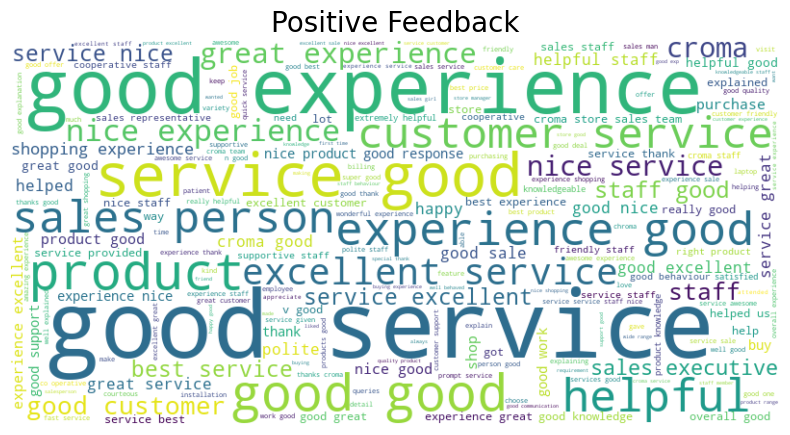

In [10]:
#word cloud for positive feedbacks
generate_word_cloud(positive_text, 'Positive Feedback')

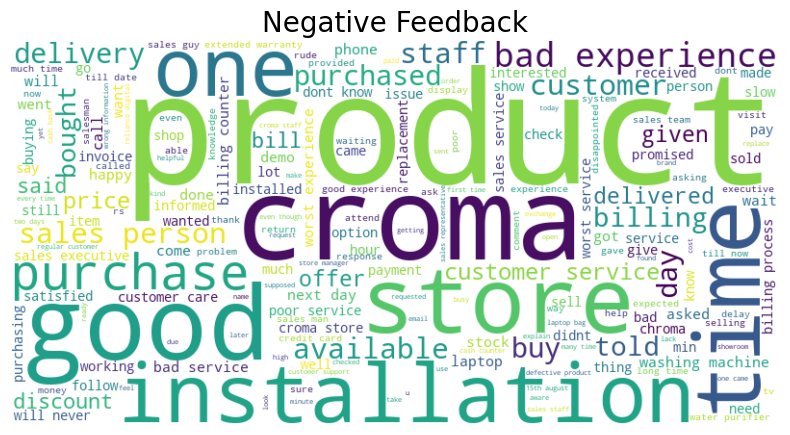

In [11]:
#word cloud for Negative feedbacks
generate_word_cloud(negative_text, 'Negative Feedback')

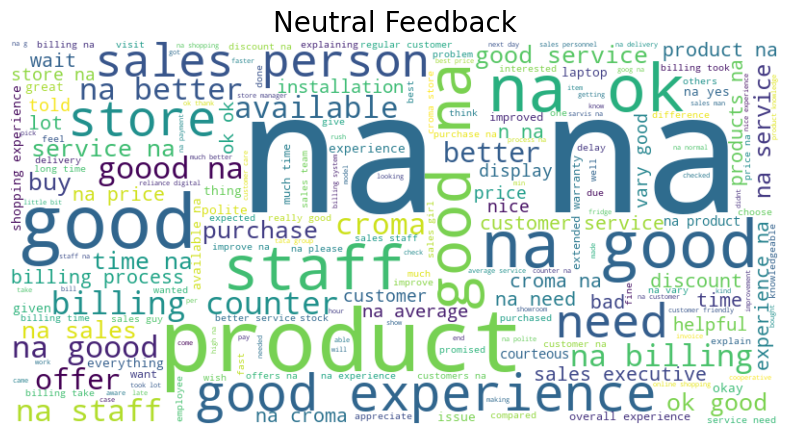

In [12]:
#word cloud for Neutral feedbacks
generate_word_cloud(neutral_text, 'Neutral Feedback')